About this file
Dataset Description

This dataset comprises approximately 11.5 million entries, structured into nine columns:
This dataset consists of nine columns, each containing specific types of data:

Dataset Nine Columns Description

X, Y, Z:
Description: Numerical values representing orientation data.
Unique Entries: Each column has 256 unique values.

EDA (Electrodermal Activity):
Description: Continuous numerical values measuring electrodermal activity.
Unique Entries: Contains 274,452 unique numerical values.

HR (Heart Rate):
Description: Continuous numerical values representing heart rate measurements.
Unique Entries: Comprises 6,268 distinct numerical values.

TEMP (Temperature):
Description: Continuous numerical values denoting temperature readings.
Unique Entries: Contains 599 unique numerical values.

id:
Description: Categorical data serving as identifiers for specific subjects or entities.
Unique Entries: Consists of 18 distinct categorical entries.

datetime:
Description: Object type encompassing a wide range of date and time entries.
Unique Entries: Holds approximately 10.6 million unique date and time values.

label:
Description: Categorical data representing different states or classes.
Unique Entries: Contains three unique categorical values.
Each column in this dataset offers distinct information. The orientation data (X, Y, Z) seemingly represents spatial or directional measurements. Electrodermal activity (EDA), heart rate (HR), and temperature (TEMP) columns provide continuous physiological measurements. The 'id' column serves as a categorical identifier, while 'datetime' indicates timestamps. Lastly, the 'label' column presents categorical classifications.

The dataset's multidimensional nature, combining various physiological measurements, orientation data, and categorical identifiers, offers a diverse landscape for potential analyses, visualizations, or modelling tasks related to stress detection, health monitoring, or broader research applications.

In [1]:
import os
import shutil
import multiprocessing
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file into a DataFrame
merged_df = pd.read_csv('C:/Users/David Agogo/Documents/Personal Projects/sensor/merged_data.csv')

# Display the first few rows of the DataFrame to check if it's loaded correctly
print(merged_df.head())


C:\Users\David Agogo\AppData\Local\Temp\ipykernel_40668\2539021442.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('C:/Users/David Agogo/Documents/Personal Projects/sensor/merged_data.csv')


      X     Y     Z       EDA     HR   TEMP  id  \
0 -13.0 -61.0   5.0  6.769995  99.43  31.17  15   
1 -20.0 -69.0  -3.0  6.769995  99.43  31.17  15   
2 -31.0 -78.0 -15.0  6.769995  99.43  31.17  15   
3 -47.0 -65.0 -38.0  6.769995  99.43  31.17  15   
4 -67.0 -57.0 -53.0  6.769995  99.43  31.17  15   

                        datetime  label  
0  2020-07-08 14:03:00.000000000    2.0  
1  2020-07-08 14:03:00.031249920    2.0  
2  2020-07-08 14:03:00.062500096    2.0  
3  2020-07-08 14:03:00.093750016    2.0  
4  2020-07-08 14:03:00.124999936    2.0  


In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usage: 790.3+ MB


In [5]:
merged_df.nunique()

X                256
Y                256
Z                256
EDA           274452
HR              6268
TEMP             599
id                18
datetime    10628304
label              3
dtype: int64

In [6]:
# Group the data by ID and get the row with the maximum temperature for each group
max_temp_rows = merged_df.loc[merged_df.groupby("id")["TEMP"].idxmax()]

# Print the details of the row with the maximum temperature for each group
print(max_temp_rows)

             X     Y      Z        EDA      HR   TEMP  id  \
144005   -57.0   4.0  -15.0   3.075611   77.07  35.50  15   
4574030  -64.0   7.0    4.0   1.662621   83.83  36.23  83   
6057489  -66.0 -31.0  -29.0  18.849356   79.98  36.57  94   
300650     7.0 -35.0   75.0   1.811155   93.52  32.61  15   
317291   -22.0 -44.0  127.0  20.073507   85.88  36.59  5C   
1869983  -47.0  25.0   40.0   1.948249   78.42  32.71  6B   
2000610  -27.0   4.0   58.0   0.515300  108.03  34.25  6D   
3206510  -53.0 -23.0  -12.0   3.388557   93.53  36.13  7A   
4096807   -7.0  35.0   52.0   0.961276   81.85  35.87  7E   
5590236  -55.0  -9.0   11.0   2.756377   90.22  35.47  83   
5668159  -64.0 -16.0  -18.0   1.838395  101.73  35.91  8B   
6025584  -32.0 -41.0   37.0  28.700640  102.67  36.45  94   
7067948  -41.0 -35.0  -86.0  11.188519   75.22  36.43  BG   
7358546   -1.0  32.0   36.0   0.102488   77.55  31.53  CE   
8516540  -50.0   5.0   42.0   0.655017   73.98  32.21  DF   
9033252   -5.0  56.0   2

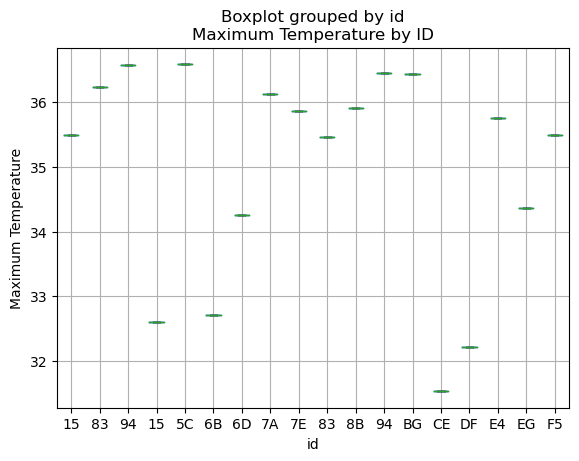

In [7]:
# Group the data by ID and calculate the maximum temperature for each group
max_temps = merged_df.groupby("id")["TEMP"].max()

# Convert the maximum temperature data to a pandas DataFrame
max_temps_merged_df = pd.DataFrame(max_temps)

# Create a boxplot with the maximum temperature data, with the ID on the x-axis
max_temps_merged_df.boxplot(column="TEMP", by="id")

# Set the axis labels and title
plt.xlabel("id")
plt.ylabel("Maximum Temperature")
plt.title("Maximum Temperature by ID")

# Display the plot
plt.show()

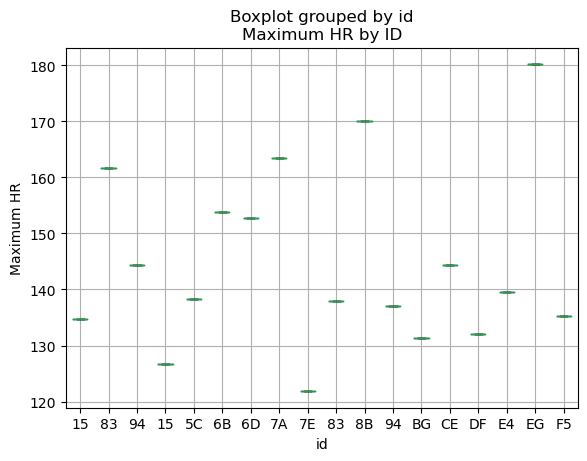

In [8]:
# Group the data by ID and calculate the maximum hr for each group
max_hr = merged_df.groupby("id")["HR"].max()

# Convert the maximum edas data to a pandas DataFrame
max_hr_merged_df = pd.DataFrame(max_hr)

# Create a boxplot with the maximum hr data, with the ID on the x-axis
max_hr_merged_df.boxplot(column="HR", by="id")

# Set the axis labels and title
plt.xlabel("id")
plt.ylabel("Maximum HR")
plt.title("Maximum HR by ID")

# Display the plot
plt.show()

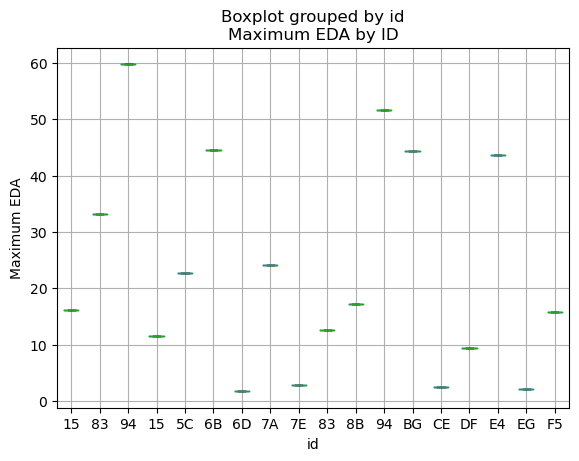

In [9]:
# Group the data by ID and calculate the maximum eda for each group
max_eda = merged_df.groupby("id")["EDA"].max()

# Convert the maximum edas data to a pandas DataFrame
max_eda_merged_df = pd.DataFrame(max_eda)

# Create a boxplot with the maximum eda data, with the ID on the x-axis
max_eda_merged_df.boxplot(column="EDA", by="id")

# Set the axis labels and title
plt.xlabel("id")
plt.ylabel("Maximum EDA")
plt.title("Maximum EDA by ID")

# Display the plot
plt.show()

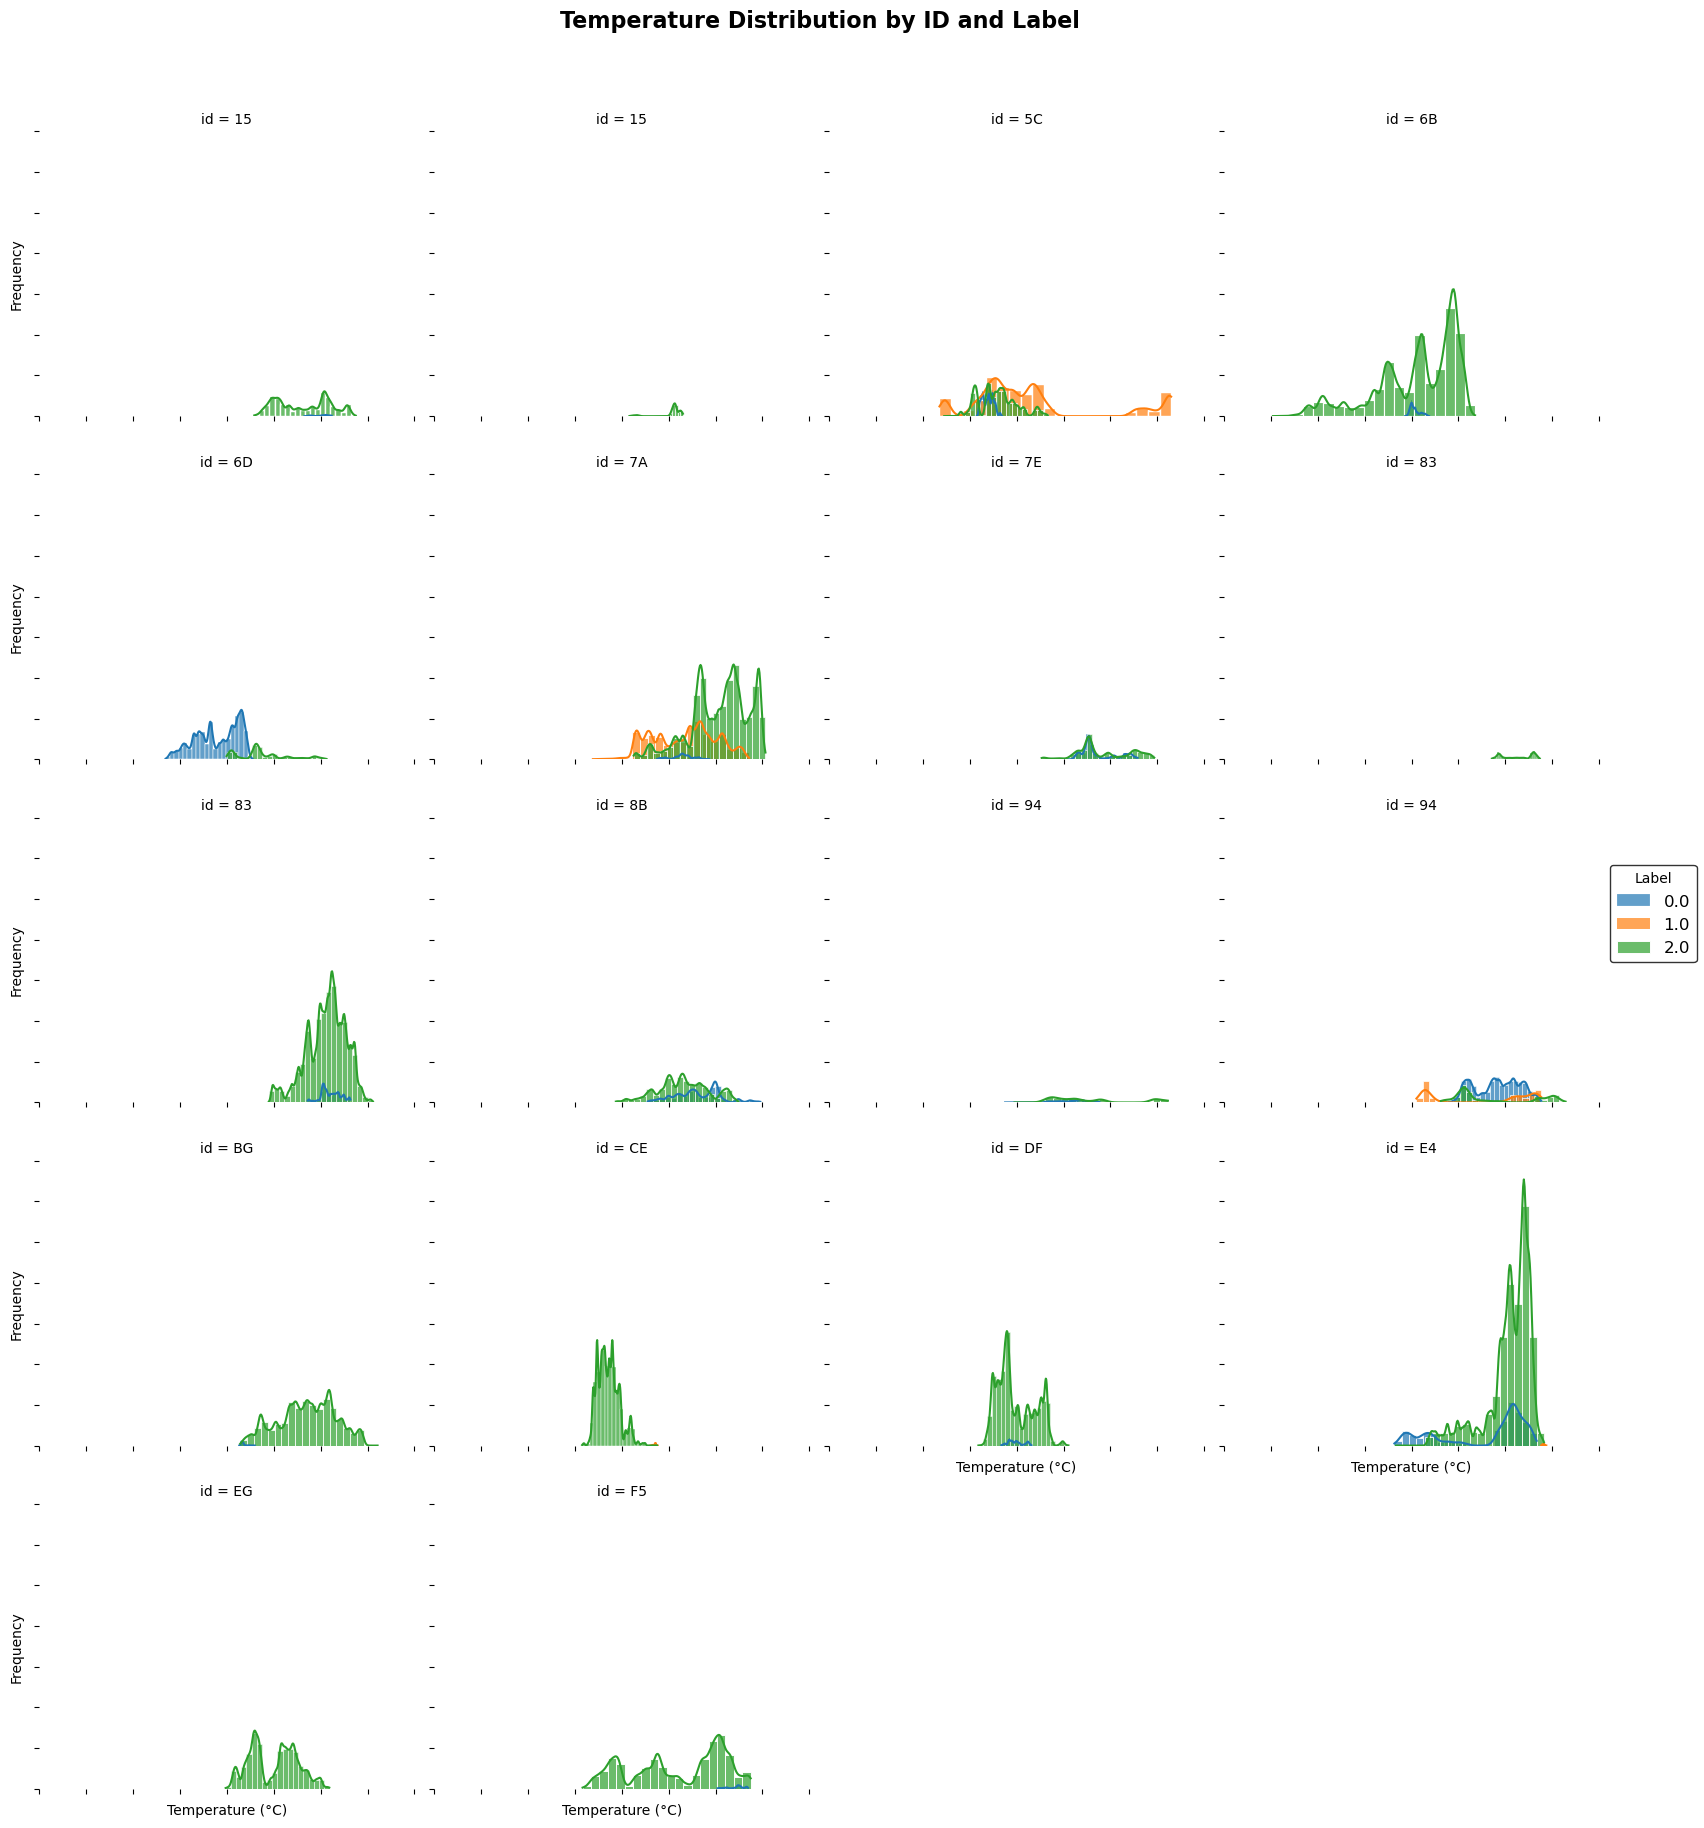

In [10]:
import seaborn as sns

# Create a FacetGrid with one plot for each combination of ID and label
g = sns.FacetGrid(merged_df, col="id", hue="label", col_wrap=4, height=3.5, aspect=1.2)

# Map a histogram of the temperature data to each plot
g.map(sns.histplot, "TEMP", bins=20, kde=True, alpha=0.7, edgecolor='white')

# Set the axis labels and title
g.set_axis_labels("Temperature (°C)", "Frequency")
g.fig.suptitle("Temperature Distribution by ID and Label", y=1.05, fontsize=16, fontweight='bold')

# Add legend
g.add_legend(fontsize=12, title="Label", title_fontsize=14, frameon=True, edgecolor='black')

# Customize ticks and spines
g.despine(left=True, bottom=True)
g.set_xticklabels(fontsize=12)
g.set_yticklabels(fontsize=12)

# Display the plot
plt.show()

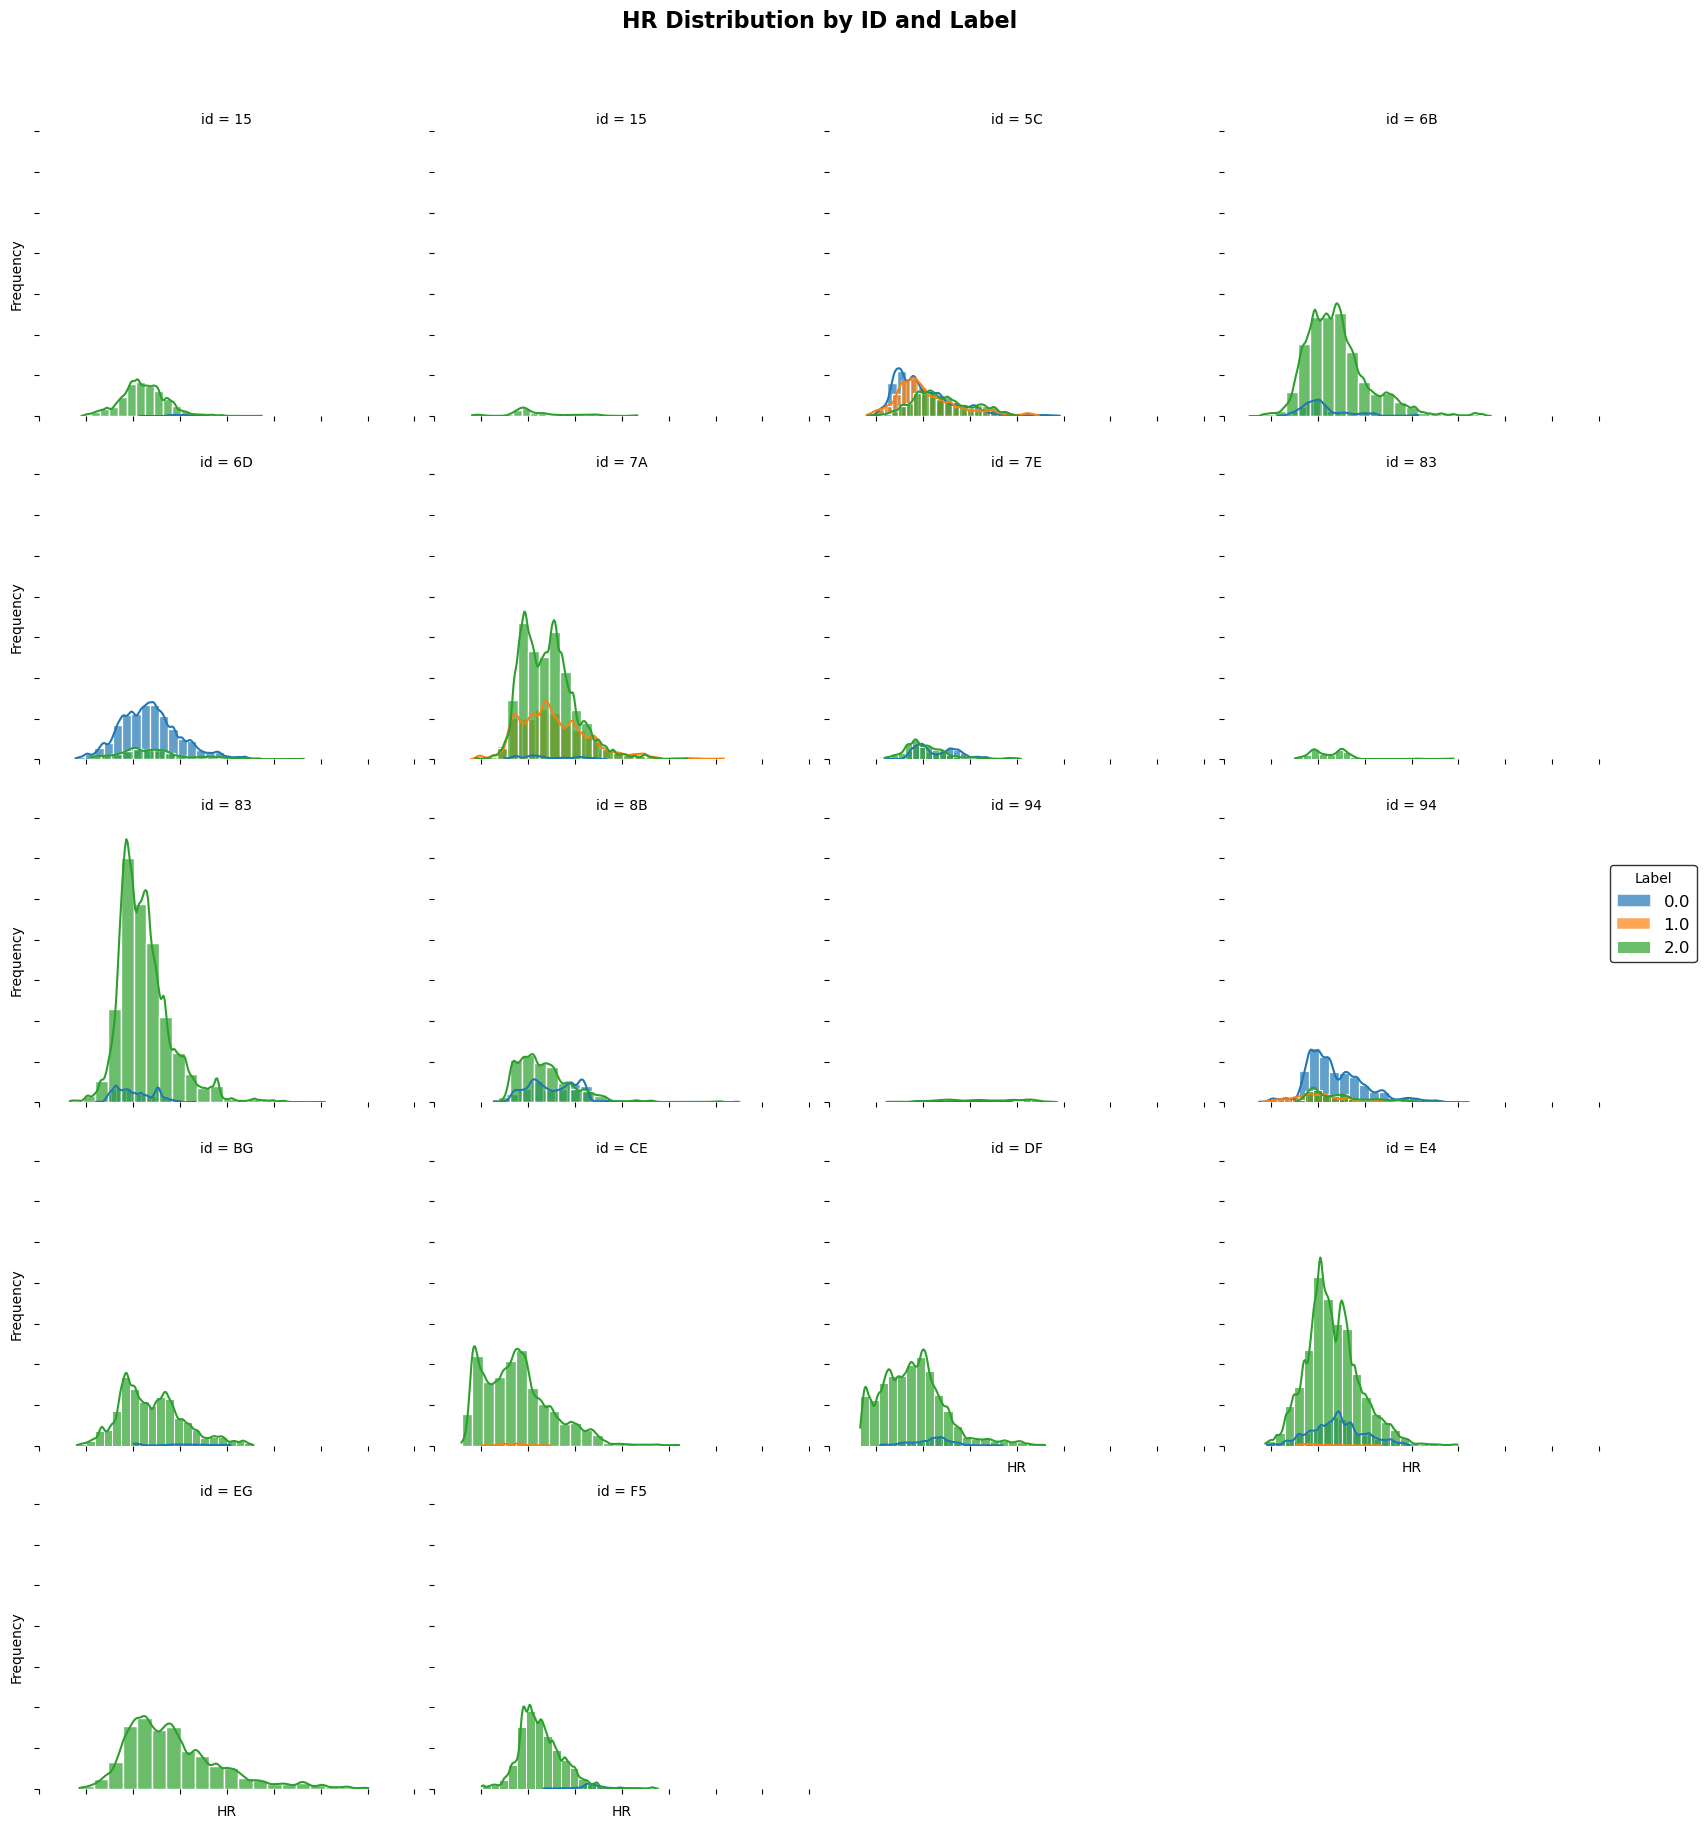

In [11]:
import seaborn as sns

# Create a FacetGrid with one plot for each combination of ID and label
g = sns.FacetGrid(merged_df, col="id", hue="label", col_wrap=4, height=3.5, aspect=1.2)

# Map a histogram of the hr data to each plot
g.map(sns.histplot, "HR", bins=20, kde=True, alpha=0.7, edgecolor='white')

# Set the axis labels and title
g.set_axis_labels("HR", "Frequency")
g.fig.suptitle("HR Distribution by ID and Label", y=1.05, fontsize=16, fontweight='bold')

# Add legend
g.add_legend(fontsize=12, title="Label", title_fontsize=14, frameon=True, edgecolor='black')

# Customize ticks and spines
g.despine(left=True, bottom=True)
g.set_xticklabels(fontsize=12)
g.set_yticklabels(fontsize=12)

# Display the plot
plt.show()


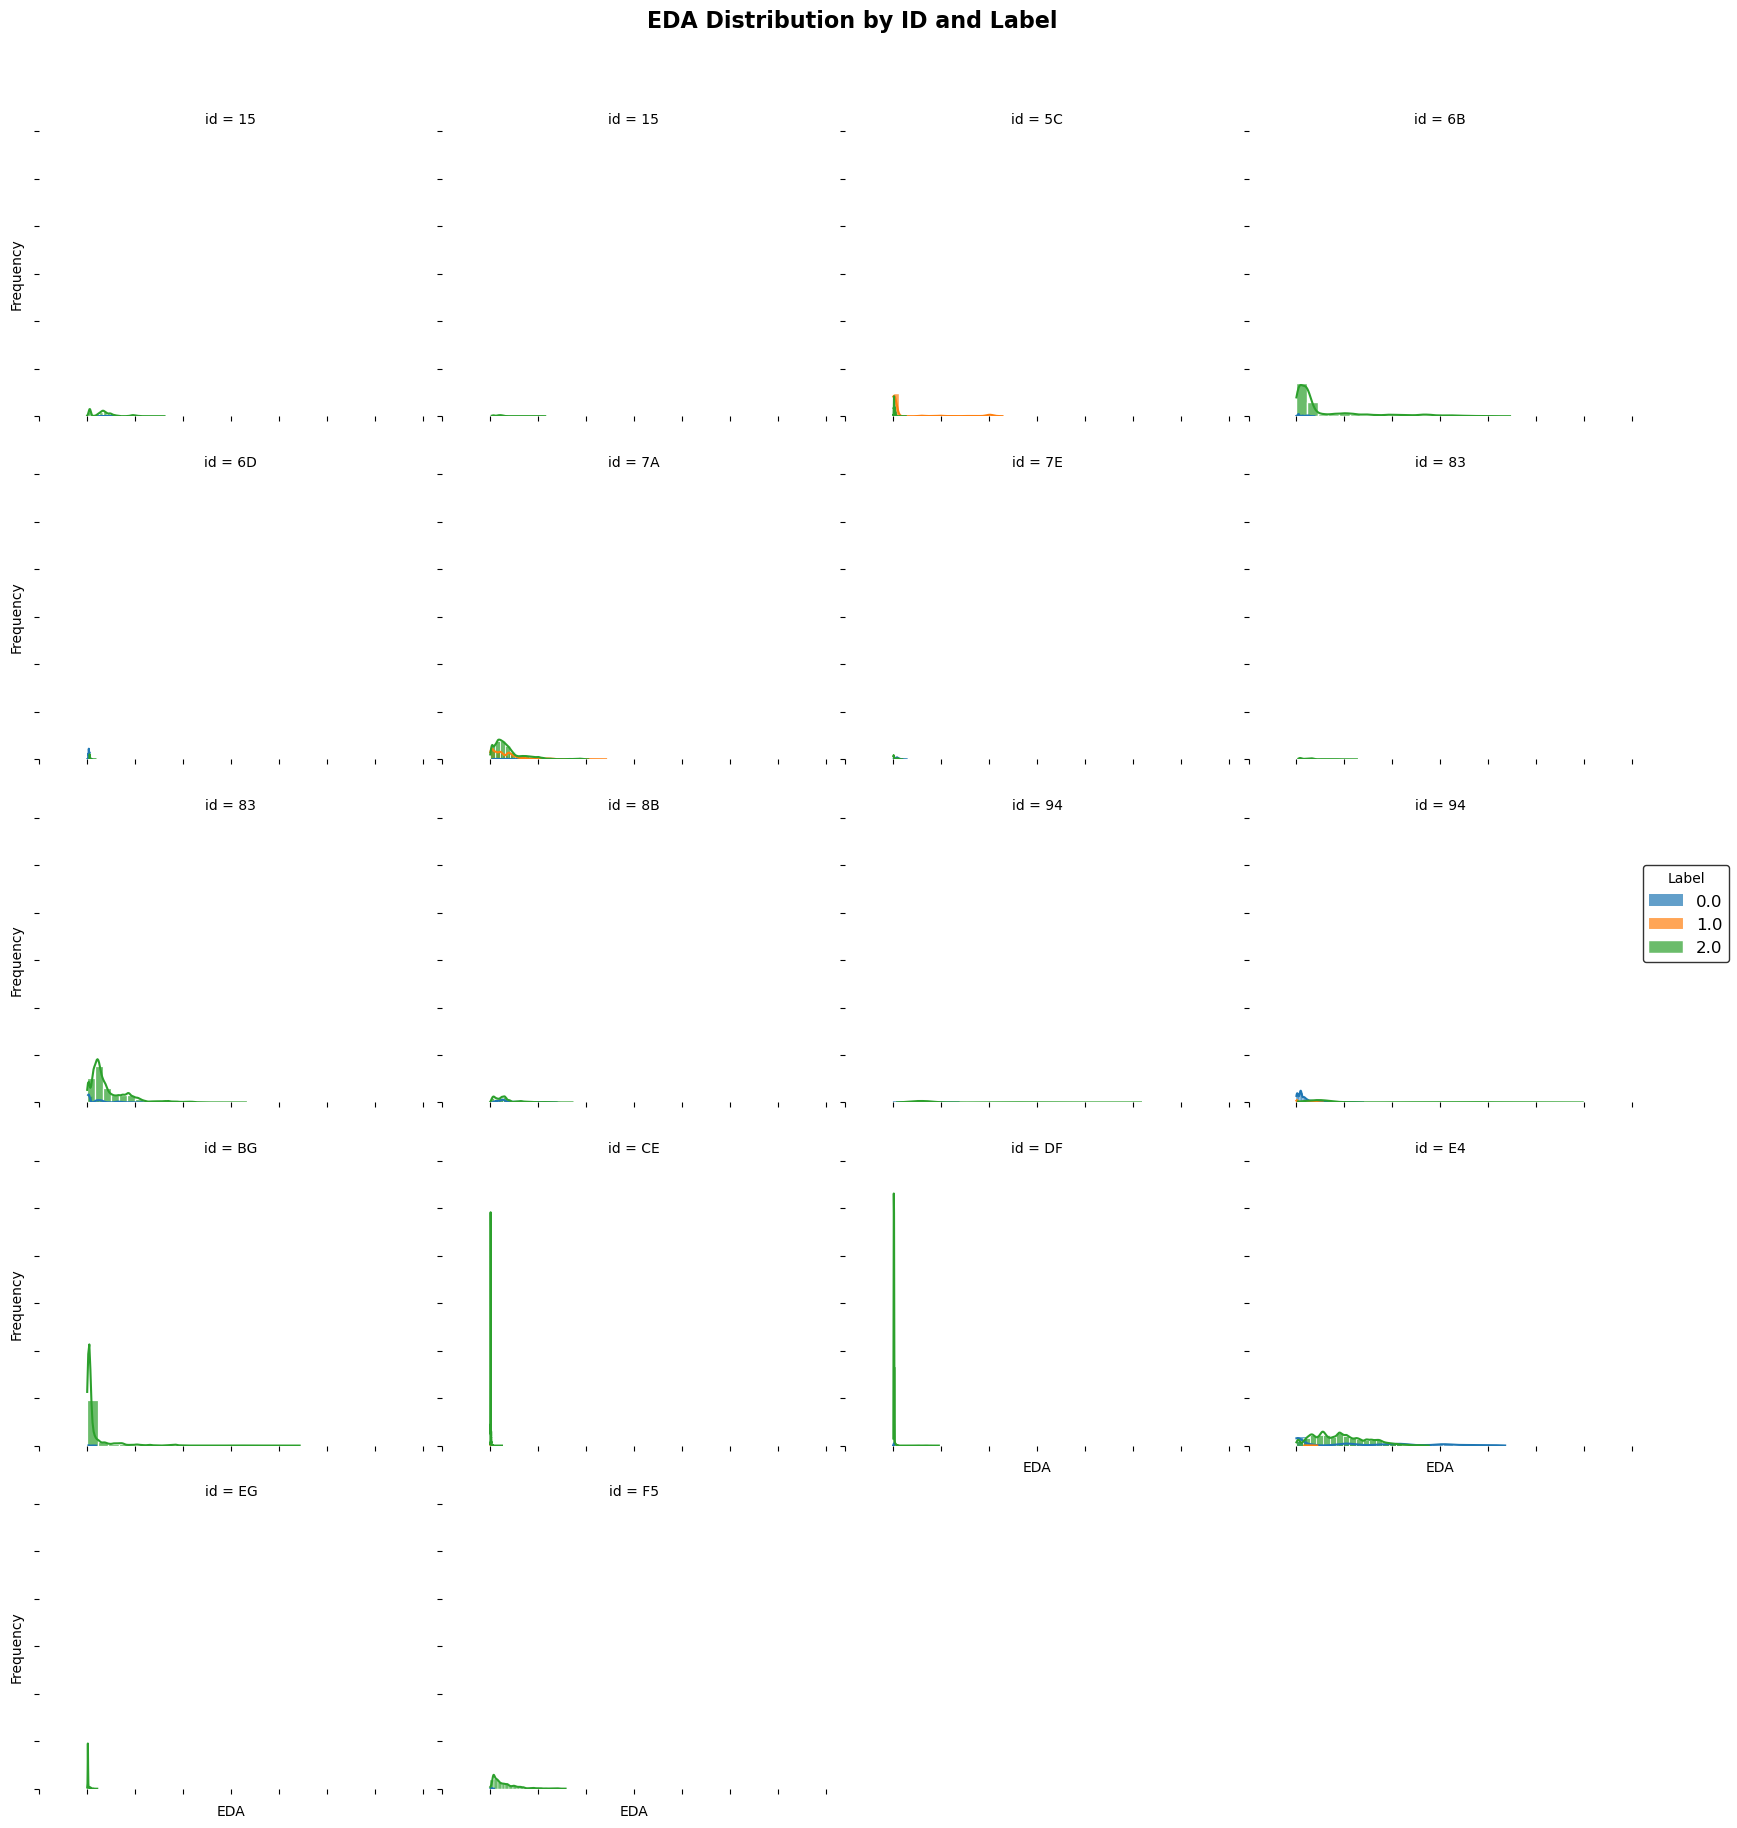

In [12]:
import seaborn as sns

# Create a FacetGrid with one plot for each combination of ID and label
g = sns.FacetGrid(merged_df, col="id", hue="label", col_wrap=4, height=3.5, aspect=1.2)

# Map a histogram of the EDA data to each plot
g.map(sns.histplot, "EDA", bins=20, kde=True, alpha=0.7, edgecolor='white')

# Set the axis labels and title
g.set_axis_labels("EDA", "Frequency")
g.fig.suptitle("EDA Distribution by ID and Label", y=1.05, fontsize=16, fontweight='bold')

# Add legend
g.add_legend(fontsize=12, title="Label", title_fontsize=14, frameon=True, edgecolor='black')

# Customize ticks and spines
g.despine(left=True, bottom=True)
g.set_xticklabels(fontsize=12)
g.set_yticklabels(fontsize=12)

# Display the plot
plt.show()

In [13]:
import pandas as pd

# group by ID and calculate maximum temperature, HR, EDA, and stress level for each ID
temp_summary = merged_df.groupby("id")["TEMP"].max().describe()
hr_summary = merged_df.groupby("id")["HR"].max().describe()
eda_summary = merged_df.groupby("id")["EDA"].max().describe()
stress_summary = merged_df.groupby("id")["label"].max().describe()

# concatenate the data frames horizontally
summary_table = pd.concat([temp_summary, hr_summary, eda_summary, stress_summary], axis=1)

# rename the columns
summary_table.columns = ["Max Temp", "Max HR", "Max EDA", "Max Stress"]

# print the summary table
print("Summary statistics for each variable by ID:\n")
print(summary_table)

Summary statistics for each variable by ID:

        Max Temp      Max HR    Max EDA  Max Stress
count  18.000000   18.000000  18.000000        18.0
mean   35.004444  144.760556  23.089486         2.0
std     1.654563   15.806070  18.630833         0.0
min    31.530000  121.820000   1.723618         2.0
25%    34.280000  134.920000   9.989892         2.0
50%    35.625000  138.970000  16.645321         2.0
75%    36.205000  153.500000  40.951425         2.0
max    36.590000  180.230000  59.760712         2.0


In [14]:
import pandas as pd

# group by ID and calculate maximum temperature, HR, EDA, and stress level for each ID
max_temp = merged_df.groupby("id")["TEMP"].max().rename("Max Temp")
max_hr = merged_df.groupby("id")["HR"].max().rename("Max HR")
max_eda = merged_df.groupby("id")["EDA"].max().rename("Max EDA")
max_stress = merged_df.groupby("id")["label"].max().rename("Max Stress")

# concatenate the data frames horizontally
summary_table = pd.concat([max_temp, max_hr, max_eda, max_stress], axis=1)

# print the summary table for all IDs
print(summary_table)

    Max Temp  Max HR    Max EDA  Max Stress
id                                         
15     35.50  134.80  16.137552         2.0
83     36.23  161.77  33.115532         2.0
94     36.57  144.33  59.760712         2.0
15     32.61  126.62  11.462811         2.0
5C     36.59  138.37  22.777302         2.0
6B     32.71  153.75  44.583832         2.0
6D     34.25  152.75   1.723618         2.0
7A     36.13  163.50  24.167313         2.0
7E     35.87  121.82   2.766914         2.0
83     35.47  137.88  12.622820         2.0
8B     35.91  170.12  17.153090         2.0
94     36.45  137.10  51.681210         2.0
BG     36.43  131.27  44.341255         2.0
CE     31.53  144.43   2.439848         2.0
DF     32.21  132.10   9.498919         2.0
E4     35.75  139.57  43.563389         2.0
EG     34.37  180.23   2.096440         2.0
F5     35.50  135.28  15.718194         2.0


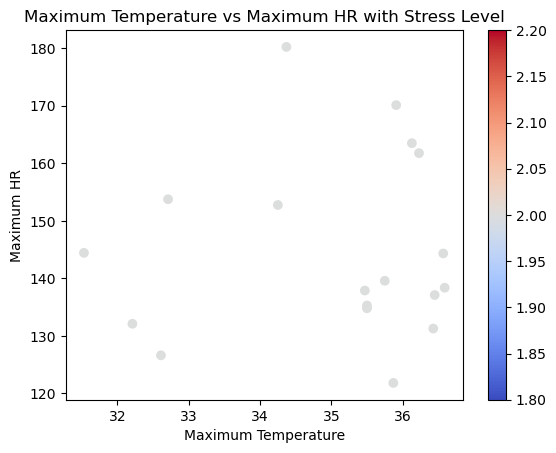

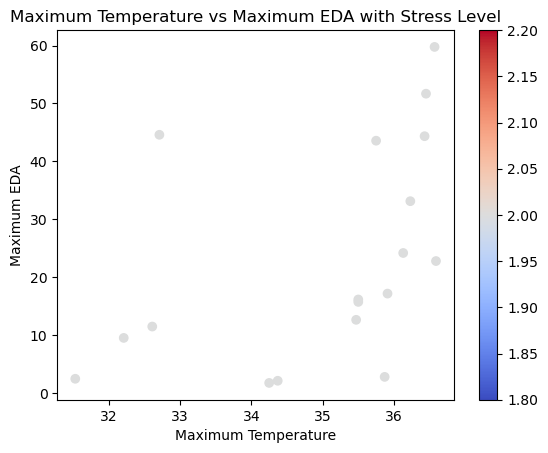

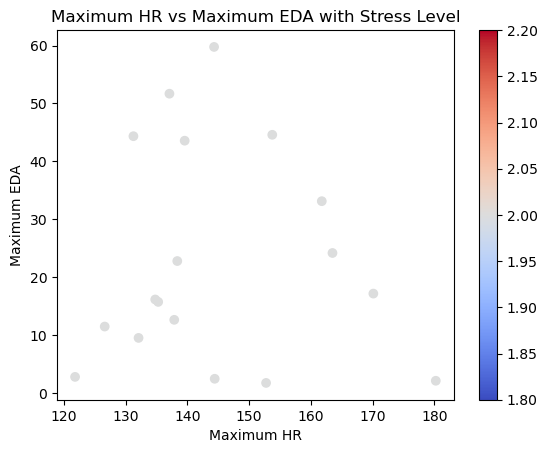

In [15]:
import matplotlib.pyplot as plt

# Get the maximum values of temperature, HR, and EDA for each individual
max_temp_rows = merged_df.loc[merged_df.groupby("id")["TEMP"].idxmax()]
max_hr = merged_df.groupby("id")["HR"].max()
max_eda = merged_df.groupby("id")["EDA"].max()

# Create scatter plots for the relationships between maximum temperature, maximum HR, and maximum EDA with the stress level as the color
plt.scatter(max_temp_rows["TEMP"], max_hr, c=merged_df.groupby("id")["label"].max(), cmap="coolwarm")
plt.xlabel("Maximum Temperature")
plt.ylabel("Maximum HR")
plt.title("Maximum Temperature vs Maximum HR with Stress Level")
plt.colorbar()
plt.show()

plt.scatter(max_temp_rows["TEMP"], max_eda, c=merged_df.groupby("id")["label"].max(), cmap="coolwarm")
plt.xlabel("Maximum Temperature")
plt.ylabel("Maximum EDA")
plt.title("Maximum Temperature vs Maximum EDA with Stress Level")
plt.colorbar()
plt.show()

plt.scatter(max_hr, max_eda, c=merged_df.groupby("id")["label"].max(), cmap="coolwarm")
plt.xlabel("Maximum HR")
plt.ylabel("Maximum EDA")
plt.title("Maximum HR vs Maximum EDA with Stress Level")
plt.colorbar()
plt.show()

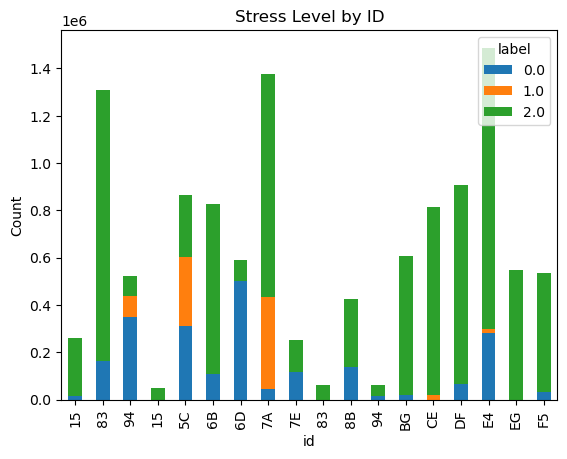

In [16]:
# Count the number of occurrences of each label for each ID
label_counts = merged_df.groupby(['id', 'label']).size().unstack()

# Create a stacked bar chart
label_counts.plot(kind='bar', stacked=True)

# Set the axis labels and title
plt.xlabel('id')
plt.ylabel('Count')
plt.title('Stress Level by ID')

# Display the plot
plt.show()

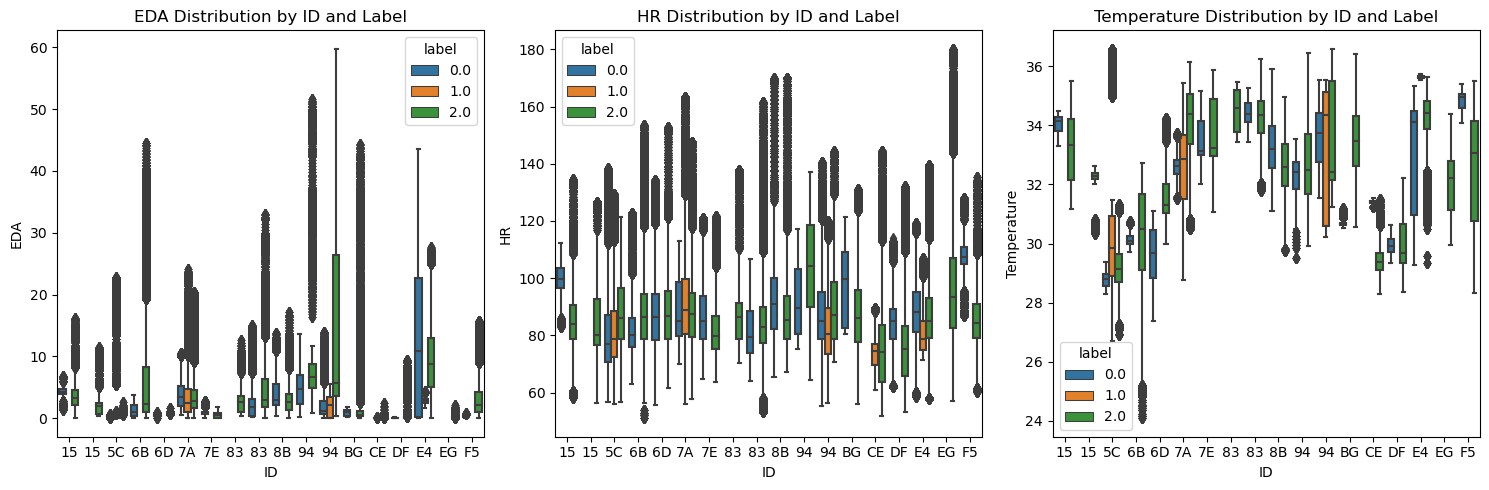

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots arranged horizontally
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Create a box plot of temperature for each ID, colored by label
sns.boxplot(x="id", y="EDA", hue="label", data=merged_df, ax=axs[0])
sns.boxplot(x="id", y="HR", hue="label", data=merged_df, ax=axs[1])
sns.boxplot(x="id", y="TEMP", hue="label", data=merged_df, ax=axs[2])

# Set the axis labels and title for each subplot
axs[0].set_xlabel("ID")
axs[0].set_ylabel("EDA")
axs[0].set_title("EDA Distribution by ID and Label")

axs[1].set_xlabel("ID")
axs[1].set_ylabel("HR")
axs[1].set_title("HR Distribution by ID and Label")

axs[2].set_xlabel("ID")
axs[2].set_ylabel("Temperature")
axs[2].set_title("Temperature Distribution by ID and Label")

# Adjust the layout of the subplots to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

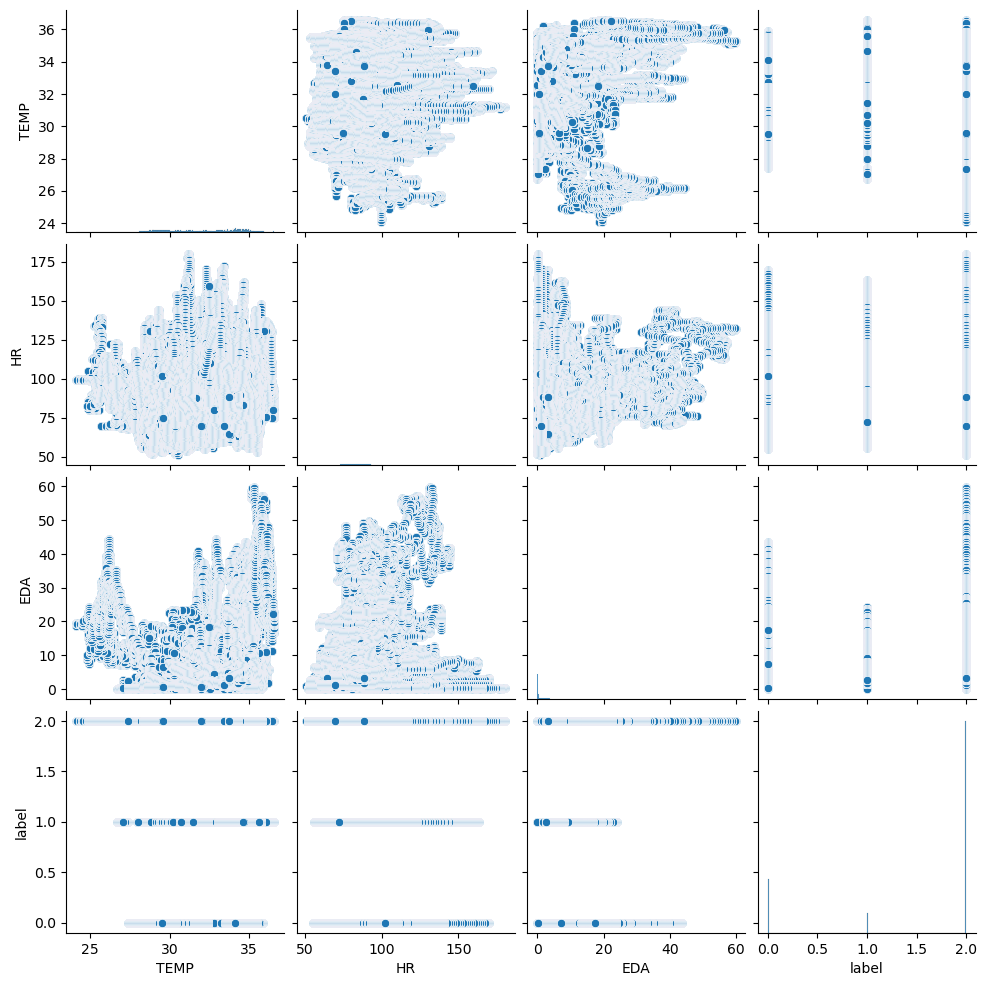

In [18]:
# Select the columns of interest
cols_of_interest = ["TEMP", "HR", "EDA", "label"]

# Create a pairplot with the selected columns
sns.pairplot(data=merged_df[cols_of_interest])

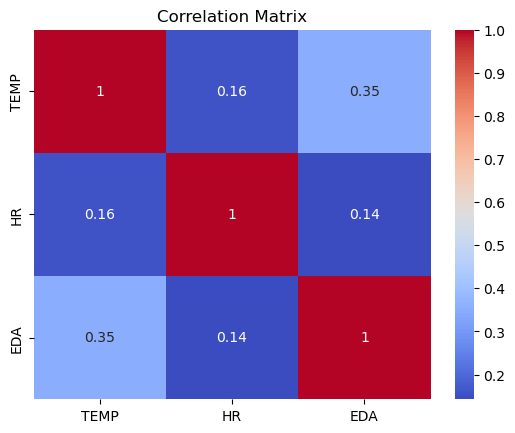

          TEMP        HR       EDA
TEMP  1.000000  0.158172  0.352888
HR    0.158172  1.000000  0.142542
EDA   0.352888  0.142542  1.000000


In [19]:
# Select only the numeric columns for correlation calculation
numeric_cols = ['TEMP', 'HR', 'EDA']  # Update these columns according to your dataset
corr_matrix = merged_df[numeric_cols].corr()

# Plot the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(corr_matrix)

In [20]:
# Calculate correlation coefficients
corr_temp = merged_df['TEMP'].corr(merged_df['label'])
corr_hr = merged_df['HR'].corr(merged_df['label'])
corr_eda = merged_df['EDA'].corr(merged_df['label'])

# Check correlation between temperature and stress level
if abs(corr_temp) >= 0.2:
    print("There is a strong correlation between temperature and stress level.")
elif abs(corr_temp) >= 0.1:
    print("There is a moderate correlation between temperature and stress level.")
else:
    print("There is no significant correlation between temperature and stress level.")

# Check correlation between HR and stress level
if abs(corr_hr) >= 0.2:
    print("There is a strong correlation between HR and stress level.")
elif abs(corr_hr) >= 0.1:
    print("There is a moderate correlation between HR and stress level.")
else:
    print("There is no significant correlation between HR and stress level.")

# Check correlation between EDA and stress level
if abs(corr_eda) >= 0.2:
    print("There is a strong correlation between EDA and stress level.")
elif abs(corr_eda) >= 0.1:
    print("There is a moderate correlation between EDA and stress level.")
else:
    print("There is no significant correlation between EDA and stress level.")

There is a moderate correlation between temperature and stress level.
There is no significant correlation between HR and stress level.
There is no significant correlation between EDA and stress level.


In [21]:
import pandas as pd

# Group data by stress level and calculate summary statistics for maximum temperature, HR, and EDA
temp_summary = merged_df.groupby("label")["TEMP"].max().describe()
hr_summary = merged_df.groupby("label")["HR"].max().describe()
eda_summary = merged_df.groupby("label")["EDA"].max().describe()

# Create a dataframe with the summary statistics
summary_df = pd.DataFrame({
    "Low Stress": [temp_summary["min"], hr_summary["min"], eda_summary["min"]],
    "Medium Stress": [temp_summary["50%"], hr_summary["50%"], eda_summary["50%"]],
    "High Stress": [temp_summary["max"], hr_summary["max"], eda_summary["max"]]
}, index=["Max Temperature", "Max HR", "Max EDA"])

# Print the summary table
print(summary_df)

                 Low Stress  Medium Stress  High Stress
Max Temperature   35.910000      36.570000    36.590000
Max HR           163.500000     169.930000   180.230000
Max EDA           24.167313      43.563389    59.760712


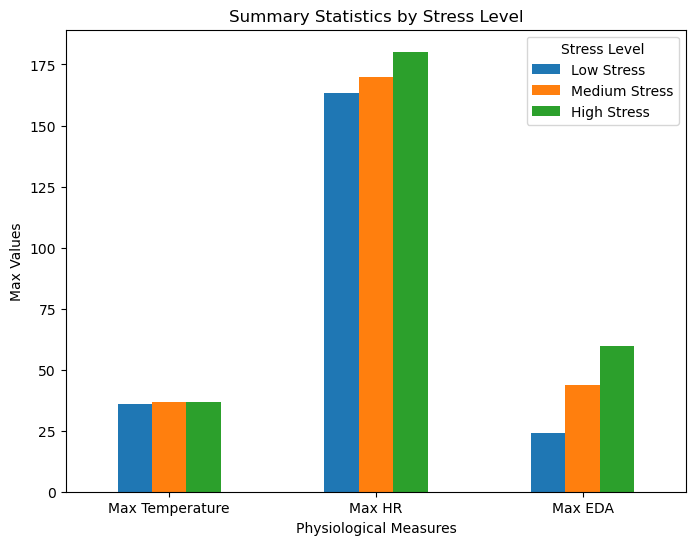

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by stress level and calculate summary statistics for maximum temperature, HR, and EDA
temp_summary = merged_df.groupby("label")["TEMP"].max().describe()
hr_summary = merged_df.groupby("label")["HR"].max().describe()
eda_summary = merged_df.groupby("label")["EDA"].max().describe()

# Create a dataframe with the summary statistics
summary_df = pd.DataFrame({
    "Low Stress": [temp_summary["min"], hr_summary["min"], eda_summary["min"]],
    "Medium Stress": [temp_summary["50%"], hr_summary["50%"], eda_summary["50%"]],
    "High Stress": [temp_summary["max"], hr_summary["max"], eda_summary["max"]]
}, index=["Max Temperature", "Max HR", "Max EDA"])

# Plot the summary table as a bar plot
ax = summary_df.plot(kind="bar", figsize=(8, 6), rot=0)

# Set plot attributes
ax.set_xlabel("Physiological Measures")
ax.set_ylabel("Max Values")
ax.set_title("Summary Statistics by Stress Level")
ax.legend(title="Stress Level")

## Machine Learning Model 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Preparation
X = merged_df[['X', 'Y', 'Z', 'TEMP', 'HR', 'EDA']]  # Features
y = merged_df['label']  # Target variable

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (if required)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error

# Train a random forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))

# Evaluate the model performance using R-squared and RMSE metrics
print('R-squared score for id prediction:', r2_score(y_test, y_pred))
print('RMSE for id prediction:', mean_squared_error(y_test, y_pred, squared=False))

Accuracy: 0.9967130229197793
Precision: 0.9967160494572419
Recall: 0.9967130229197793
F1-score: 0.9967070258939938
R-squared score for id prediction: 0.9854372495113038
RMSE for id prediction: 0.09520820207233134


# Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# Calculate precision
prec = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
rec = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

# Evaluate the model performance using R-squared and RMSE metrics
print('R-squared score for id prediction:', r2_score(y_test, y_pred))
print('RMSE for id prediction:', mean_squared_error(y_test, y_pred, squared=False))

importances = clf.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

Accuracy: 99.33%
Precision: 0.993
Recall: 0.993
F1 Score: 0.993
R-squared score for id prediction: 0.9701060548199691
RMSE for id prediction: 0.1364093930476284
X: 0.0724938512388591
Y: 0.09717598999216097
Z: 0.08284575539944994
TEMP: 0.24490959561344663
HR: 0.1679945348782555
EDA: 0.33458027287782793


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error

# Train the logistic regression model with increased max_iter and different solver
clf = LogisticRegression(random_state=42, max_iter=1000, solver='saga')
clf.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model performance using accuracy score, precision score, recall score, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Evaluate the model performance using R-squared and RMSE metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the results
print("Accuracy:", accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('R-squared score for id prediction:', r2)
print('RMSE for id prediction:', rmse)

Accuracy: 0.7423593857184625
Precision: 0.6249816581397215
Recall: 0.7423593857184625
F1-score: 0.6326226881517147
R-squared score for id prediction: -0.31884916780209527
RMSE for id prediction: 0.906045952190686


# K-Nearest Neighbors (KNN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))

# Evaluate the model performance using R-squared and RMSE metrics
print('R-squared score for id prediction:', r2_score(y_test, y_pred))
print('RMSE for id prediction:', mean_squared_error(y_test, y_pred, squared=False))

Accuracy: 0.9009649358700605
Precision: 0.8984473950128848
Recall: 0.9009649358700605
F1-score: 0.898877010274865
R-squared score for id prediction: 0.5208684091190227
RMSE for id prediction: 0.5461099166832738


# Naive Bayes Classifier

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))

# Evaluate the model performance using R-squared and RMSE metrics
print('R-squared score for id prediction:', r2_score(y_test, y_pred))
print('RMSE for id prediction:', mean_squared_error(y_test, y_pred, squared=False))

Accuracy: 0.7379745774088315
Precision: 0.6585795500926844
Recall: 0.7379745774088315
F1-score: 0.6421618736053771
R-squared score for id prediction: -0.3509235123363885
RMSE for id prediction: 0.9169972640204308


# Neural Network

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
import numpy as np

# Split data into training and testing sets
X = merged_df[['X', 'Y', 'Z', 'TEMP', 'HR', 'EDA']].values # input variables
y = merged_df['label'].values # target variable
y = to_categorical(y) # one-hot encoding of target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=6))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))

# Evaluate the model performance using R-squared and RMSE metrics
print('R-squared score for id prediction:', r2_score(y_test, y_pred))
print('RMSE for id prediction:', mean_squared_error(y_test, y_pred, squared=False))




Epoch 1/10


287727/287727 [==============================] - 234s 810us/step - loss: 0.5390 - accuracy: 0.8008
Epoch 2/10
287727/287727 [==============================] - 230s 801us/step - loss: 0.4973 - accuracy: 0.8178
Epoch 3/10
287727/287727 [==============================] - 231s 803us/step - loss: 0.4858 - accuracy: 0.8218
Epoch 4/10
287727/287727 [==============================] - 233s 810us/step - loss: 0.4756 - accuracy: 0.8251
Epoch 5/10
287727/287727 [==============================] - 231s 804us/step - loss: 0.4636 - accuracy: 0.8286
Epoch 6/10
287727/287727 [==============================] - 231s 804us/step - loss: 0.4505 - accuracy: 0.8333
Epoch 7/10
287727/287727 [==============================] - 231s 801us/step - loss: 0.4419 - accuracy: 0.8367
Epoch 8/10
287727/287727 [==============================] - 232s 807us/step - loss: 0.4374 - accuracy: 0.8385
Epoch 9/10
287727/287727 [==============================] - 241s 839us/step - loss: 0.4342 - accuracy: 0.8398
Epoch

# Summary:

This study involved training six machine learning algorithms using a dataset comprised of six physiological indicators to ascertain various stress levels. Among these, the Random Forest Classifier demonstrated exceptional accuracy (99.64%), excelling in precision, recall, and F1-score metrics. Conversely, the Logistic Regression model underperformed, exhibiting a negative R-squared value. However, the KNN Classifier showed better results than the Logistic Regression model. Additionally, the Neural Network model attained an 0.84 accuracy on the test dataset.

The analysis identified EDA as the most critical factor for stress detection, with HR, Z, and X also being significant contributors. Based on these findings, it is recommended that the company tackles the issue of class imbalance within the dataset, evaluates the importance of physiological signals for accurate stress detection, prioritizes optimization for recall, and ensures the algorithm’s decision-making process remains clear and interpretable for users.